# Advent of Code - Day 10

In [94]:
lines = open('input.txt', 'r').readlines()

surroundings = [
    (-1, 0), # left
    (+1, 0), # right
    (0, +1), # down
    (0, -1), # up
]

characters = {
    '|': { (0, -1): True,  (0, +1): True,  (-1, 0): False, (+1, 0): False },
    '-': { (0, -1): False, (0, +1): False, (-1, 0): True,  (+1, 0): True },
    'L': { (0, -1): True,  (0, +1): False, (-1, 0): False, (+1, 0): True },
    'J': { (0, -1): True,  (0, +1): False, (-1, 0): True,  (+1, 0): False },
    '7': { (0, -1): False, (0, +1): True,  (-1, 0): True,  (+1, 0): False },
    'F': { (0, -1): False, (0, +1): True,  (-1, 0): False, (+1, 0): True },
}

def get_start_position():
    start_y = None
    start_x = None

    for index, line in enumerate(lines):
        start_x = line.find('S')
        if start_x > -1:
            start_y = index
            break
    
    print(f'Start is at {start_x}, {start_y}.')


    return (start_x, start_y)

def get_loop_positions():
    start_position = get_start_position()
    current_position = start_position
    latest_move = None

    loop_positions = []

    # find entrance of pipe from 'S'
    for neighbour in surroundings:
        neighbour_character = lines[current_position[1] + neighbour[1]][current_position[0] + neighbour[0]]
        if neighbour_character in characters and characters[neighbour_character][(neighbour[0] * -1, neighbour[1] * -1)]:
            current_position = (current_position[0] + neighbour[0], current_position[1] + neighbour[1])
            loop_positions.append(current_position)
            latest_move = neighbour
            break

    while current_position != start_position:
        current_character = lines[current_position[1]][current_position[0]]
        directions = characters[current_character]
        next_direction = [key for key in directions if directions[key] and key != (latest_move[0] * -1, latest_move[1] * -1)][0]
        
        current_position = (current_position[0] + next_direction[0], current_position[1] + next_direction[1])
        loop_positions.append(current_position)
        latest_move = next_direction

    return loop_positions

loop_positions = get_loop_positions()

Start is at 79, 64.


In [95]:
import math

## Part 1

In [96]:
print('Part 1: ' + str(math.ceil(len(loop_positions)/2)))


Part 1: 6820


## Part 2

The general idea is to pretty much use a scanline rasterization approach.
I pass the grid line by line. On each edge the state switches between inside and outside. Then all that is left is to count up the non-path cells while inside the path.
A tricky part was figuring out that only transitions from north to south are actual edges for the scanline.
In a section like `--7L---JF--` the `L---J` is basically just a path edge "touching" the scanline, not actually crossing it and can thus be ignored.

In [97]:
import matplotlib.pyplot as plt
import numpy as np

Start is at 79, 64.
Part 2: 337


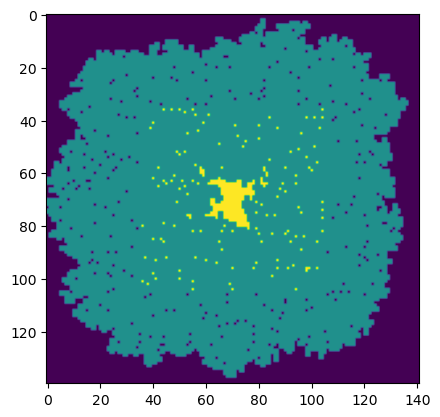

In [98]:
image = np.zeros(shape=(len(lines), len(lines[0])), dtype=int)

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        if (x, y) in loop_positions:
            image[y, x] = 1


start_position = get_start_position()
# this replacement could be done with code but I just used my eyeballs instead
lines[start_position[1]] = lines[start_position[1]].replace('S', '|')

numbers_of_cells_inside = 0
for y in range(image.shape[0]):
    is_inside_polygon = False
    transition_points_north = 0
    transition_points_south = 0
    for x in range(image.shape[1]):
        if image[y, x] == 1:
            edge_character = lines[y][x]
            if characters[edge_character][(0, +1)]:
                transition_points_north = (transition_points_north + 1) % 2
            if characters[edge_character][(0, -1)]:
                transition_points_south = (transition_points_south + 1) % 2
            
            if transition_points_south == 1 and transition_points_north == 1:
                is_inside_polygon = not is_inside_polygon
                transition_points_north = 0
                transition_points_south = 0

        # non-path cell
        if is_inside_polygon and not image[y, x] == 1:
            numbers_of_cells_inside += 1
            image[y, x] = 2

plt.imshow(image)

print("Part 2: " + str(numbers_of_cells_inside))
